In [1]:
from classes.drawer import Peristalsis
from classes.basic_optical_gating import BasicOpticalGating as BOG
from classes.iplotter import iBasicOpticalGatingPlotter as IPLOT

import matplotlib.pyplot as plt
import tifffile as tf
import numpy as np


In [2]:
v = Peristalsis(15, 80.135, (128, 64))
v.generate_sequence()
tf.imwrite("test.tif", v.sequence)

BOG i Loading sequence
BOG ✓ Sequence loaded with 2000 frames
BOG i Generating reference sequence from input sequence
BOG ✓ Found a period I'm happy with: 76.4929489878474
BOG i Start index: 32; Stop index: 113; Period 76.4929489878474
BOG i Calculating similarity metric using method: jSAD
BOG ✓ SADs calculated
BOG i Calculating phases
BOG ✓ Phases calculated
BOG i Calculating delta phases
BOG ✓ Delta phases calculated
BOG i Unwrapping phases
BOG ✓ Unwrapped phases calculated
BOG ✓ Finished processing sequence.
BOG i Loading sequence
BOG ✓ Sequence loaded with 2000 frames
BOG i Generating reference sequence from input sequence
BOG ✓ Found a period I'm happy with: 306.2209554777414
BOG i Start index: 111; Stop index: 422; Period 306.2209554777414
BOG i Calculating similarity metric using method: jSAD
BOG ✓ SADs calculated
BOG i Calculating phases
BOG ✓ Phases calculated
BOG i Calculating delta phases
BOG ✓ Delta phases calculated
BOG i Unwrapping phases
BOG ✓ Unwrapped phases calculated

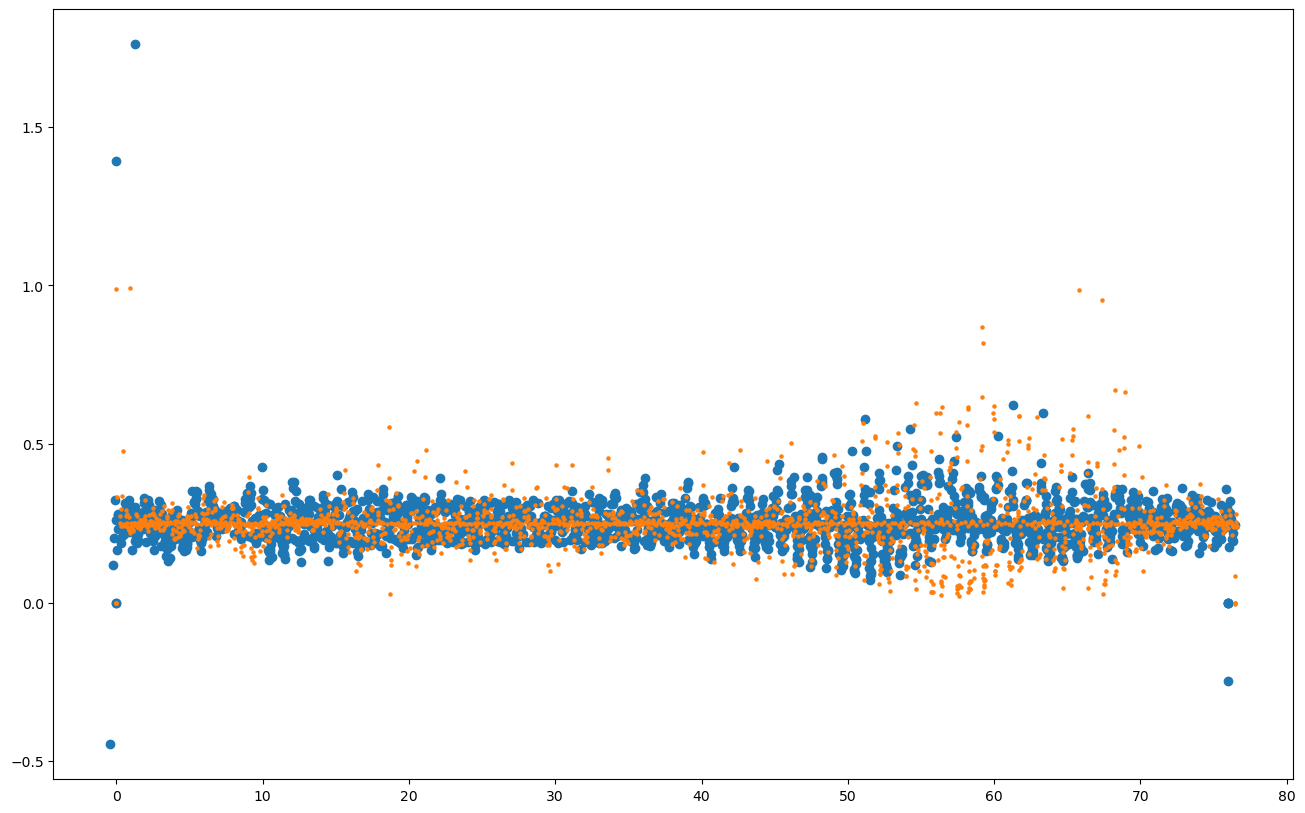

In [9]:
plt.figure(figsize=(16,10))
og1 = BOG()
og1.set_sequence("D:/Data/both 800fps/brightfield/*tif")
og1.settings["reference_framerate_reduction"] = 4
og1.settings["subframe_method"] = "n-u-fitting"
og1.settings["u_fitting_points"] = 2
og1.run()
tf.imwrite("test.tif", og1.reference_sequence)

plt.scatter(og1.phases[1::], og1.delta_phases)

og2 = BOG()
og2.set_sequence("D:/Data/both 800fps/brightfield/*tif")
og2.settings["reference_framerate_reduction"] = 1
og2.settings["subframe_method"] = "n-u-fitting"
og2.settings["u_fitting_points"] = 2
og2.run()
tf.imwrite("test2.tif", og2.reference_sequence)


plt.scatter(og2.phases[1::] / 4, og2.delta_phases / 4, s = 5)
plt.show()


In [5]:
ipl = IPLOT([og1, og2])
ipl.plot_sads()
ipl.plot_delta_phases_phases()

interactive(children=(IntSlider(value=0, description='frame_number', layout=Layout(width='900px'), max=1999), …

interactive(children=(IntRangeSlider(value=(0, 1999), description='frame_indices', layout=Layout(width='900px'…